## Bank Marketing Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.tree as tree
import pydotplus
from IPython.display import Image
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank/bank-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
#Data Cleaning
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
##Visualization
subscriber = df['y'].value_counts()
subscriber

no     39922
yes     5289
Name: y, dtype: int64

Text(0.5, 1.15, 'Percentage of a Term Deposit Subscriber')

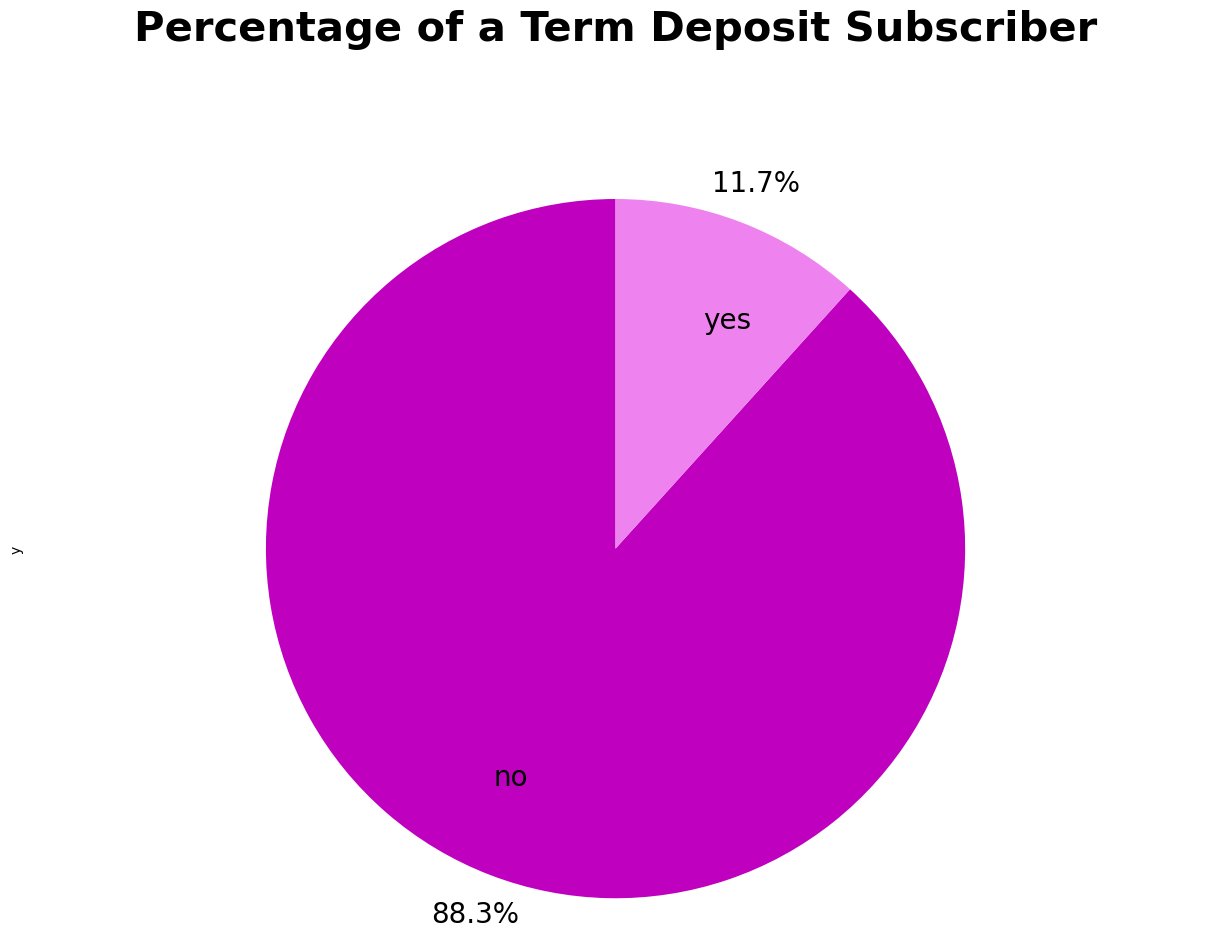

In [10]:
lable=['no', 'yes']

ax = plt.axes()
ax.set_facecolor("lightblue")

subscriber.plot(
    kind='pie',
    figsize=(15,10),
    autopct='%1.1f%%', 
    startangle=90, 
    shadow=False,
    pctdistance=1.12,
    labels = lable,
    labeldistance = 0.7,
    colors = ['m', 'violet'],
    textprops={'fontsize': 20,'color':'k'})
    
plt.axis('equal')
plt.title("Percentage of a Term Deposit Subscriber", y=1.15, weight='bold',size='30')


Dari Chart diatas diketahui bahwa 11.3% atau 4639 client yang memutuskan untuk berlangganan produk (bank term deposit) pada lembaga bank di Portugis. Sisa dari client tersebut yakni sebesar 88.7% atau 36537 client yang memutuskan untuk tidak berlangganan produk.

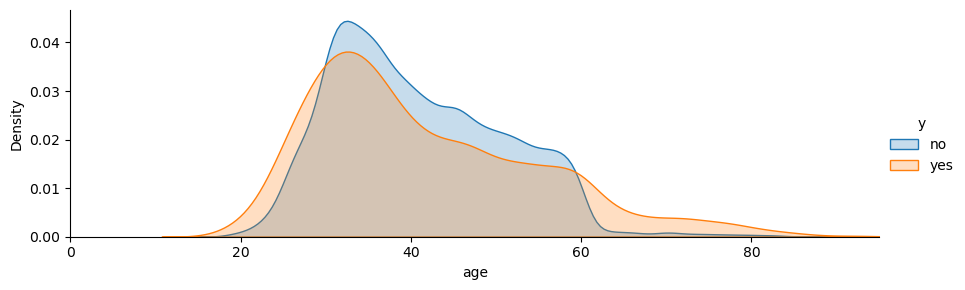

In [11]:
df_age = sns.FacetGrid(df, hue="y", aspect = 3)
df_age.map(sns.kdeplot, 'age', shade=True)
df_age.set(xlim=(0, df['age'].max()))
df_age._finalize_grid
df_age.add_legend()

plt.show()

Berdasar visualisasi chart diketahui bahwa client yang menjadi sasaran market dalam campaign berkisar pada rentang umur pertengahan umur 0-20 sampai akhir umur 80-100. Pada Chart tersebut terdata bahwa client yang setuju dikisaran usia awal 20-40 tahun. Sedangkan jumlah client terdata meningkat pada usia pertengahan 20-40. Kesimpulannya jumlah client meningkat pada kisaran usia 20-40 dan menurut di kisaran usia 40 namun pada rentang usia 60-80 mengalami penurunan yang cukup jauh.

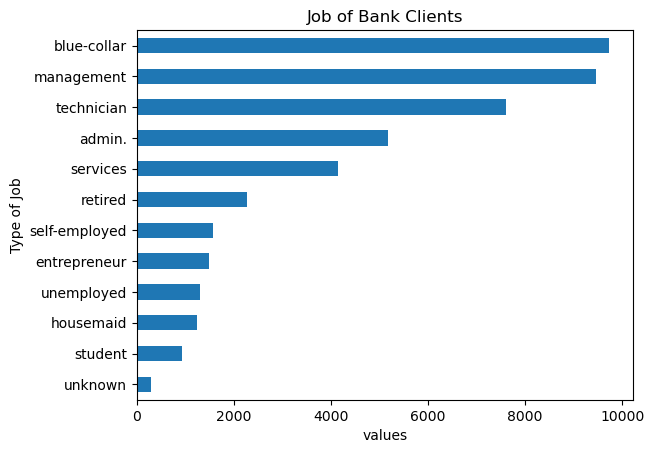

In [12]:
job = df['job'].value_counts().sort_values(ascending=True)

job.plot(kind='barh')
plt.title('Job of Bank Clients')
plt.xlabel("values")
plt.ylabel("Type of Job")
plt.show()


Berdasarkan visualisasi chart diketahui terdapat 12 jenis pekerjaan pada client lembaga perbankan Portugis ini. Ditemukan jenis pekerjaan terbanyak ditemui pada client adalah admin

In [13]:
#data Preprocessing
label_encoder = preprocessing.LabelEncoder()

df_category = df.select_dtypes(include='object')
df_copy = df.copy()

for column in df_category.columns:
    df_copy[column] = label_encoder.fit_transform(df[column])

In [14]:
df_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [15]:
def plot_corr(df, size=30):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

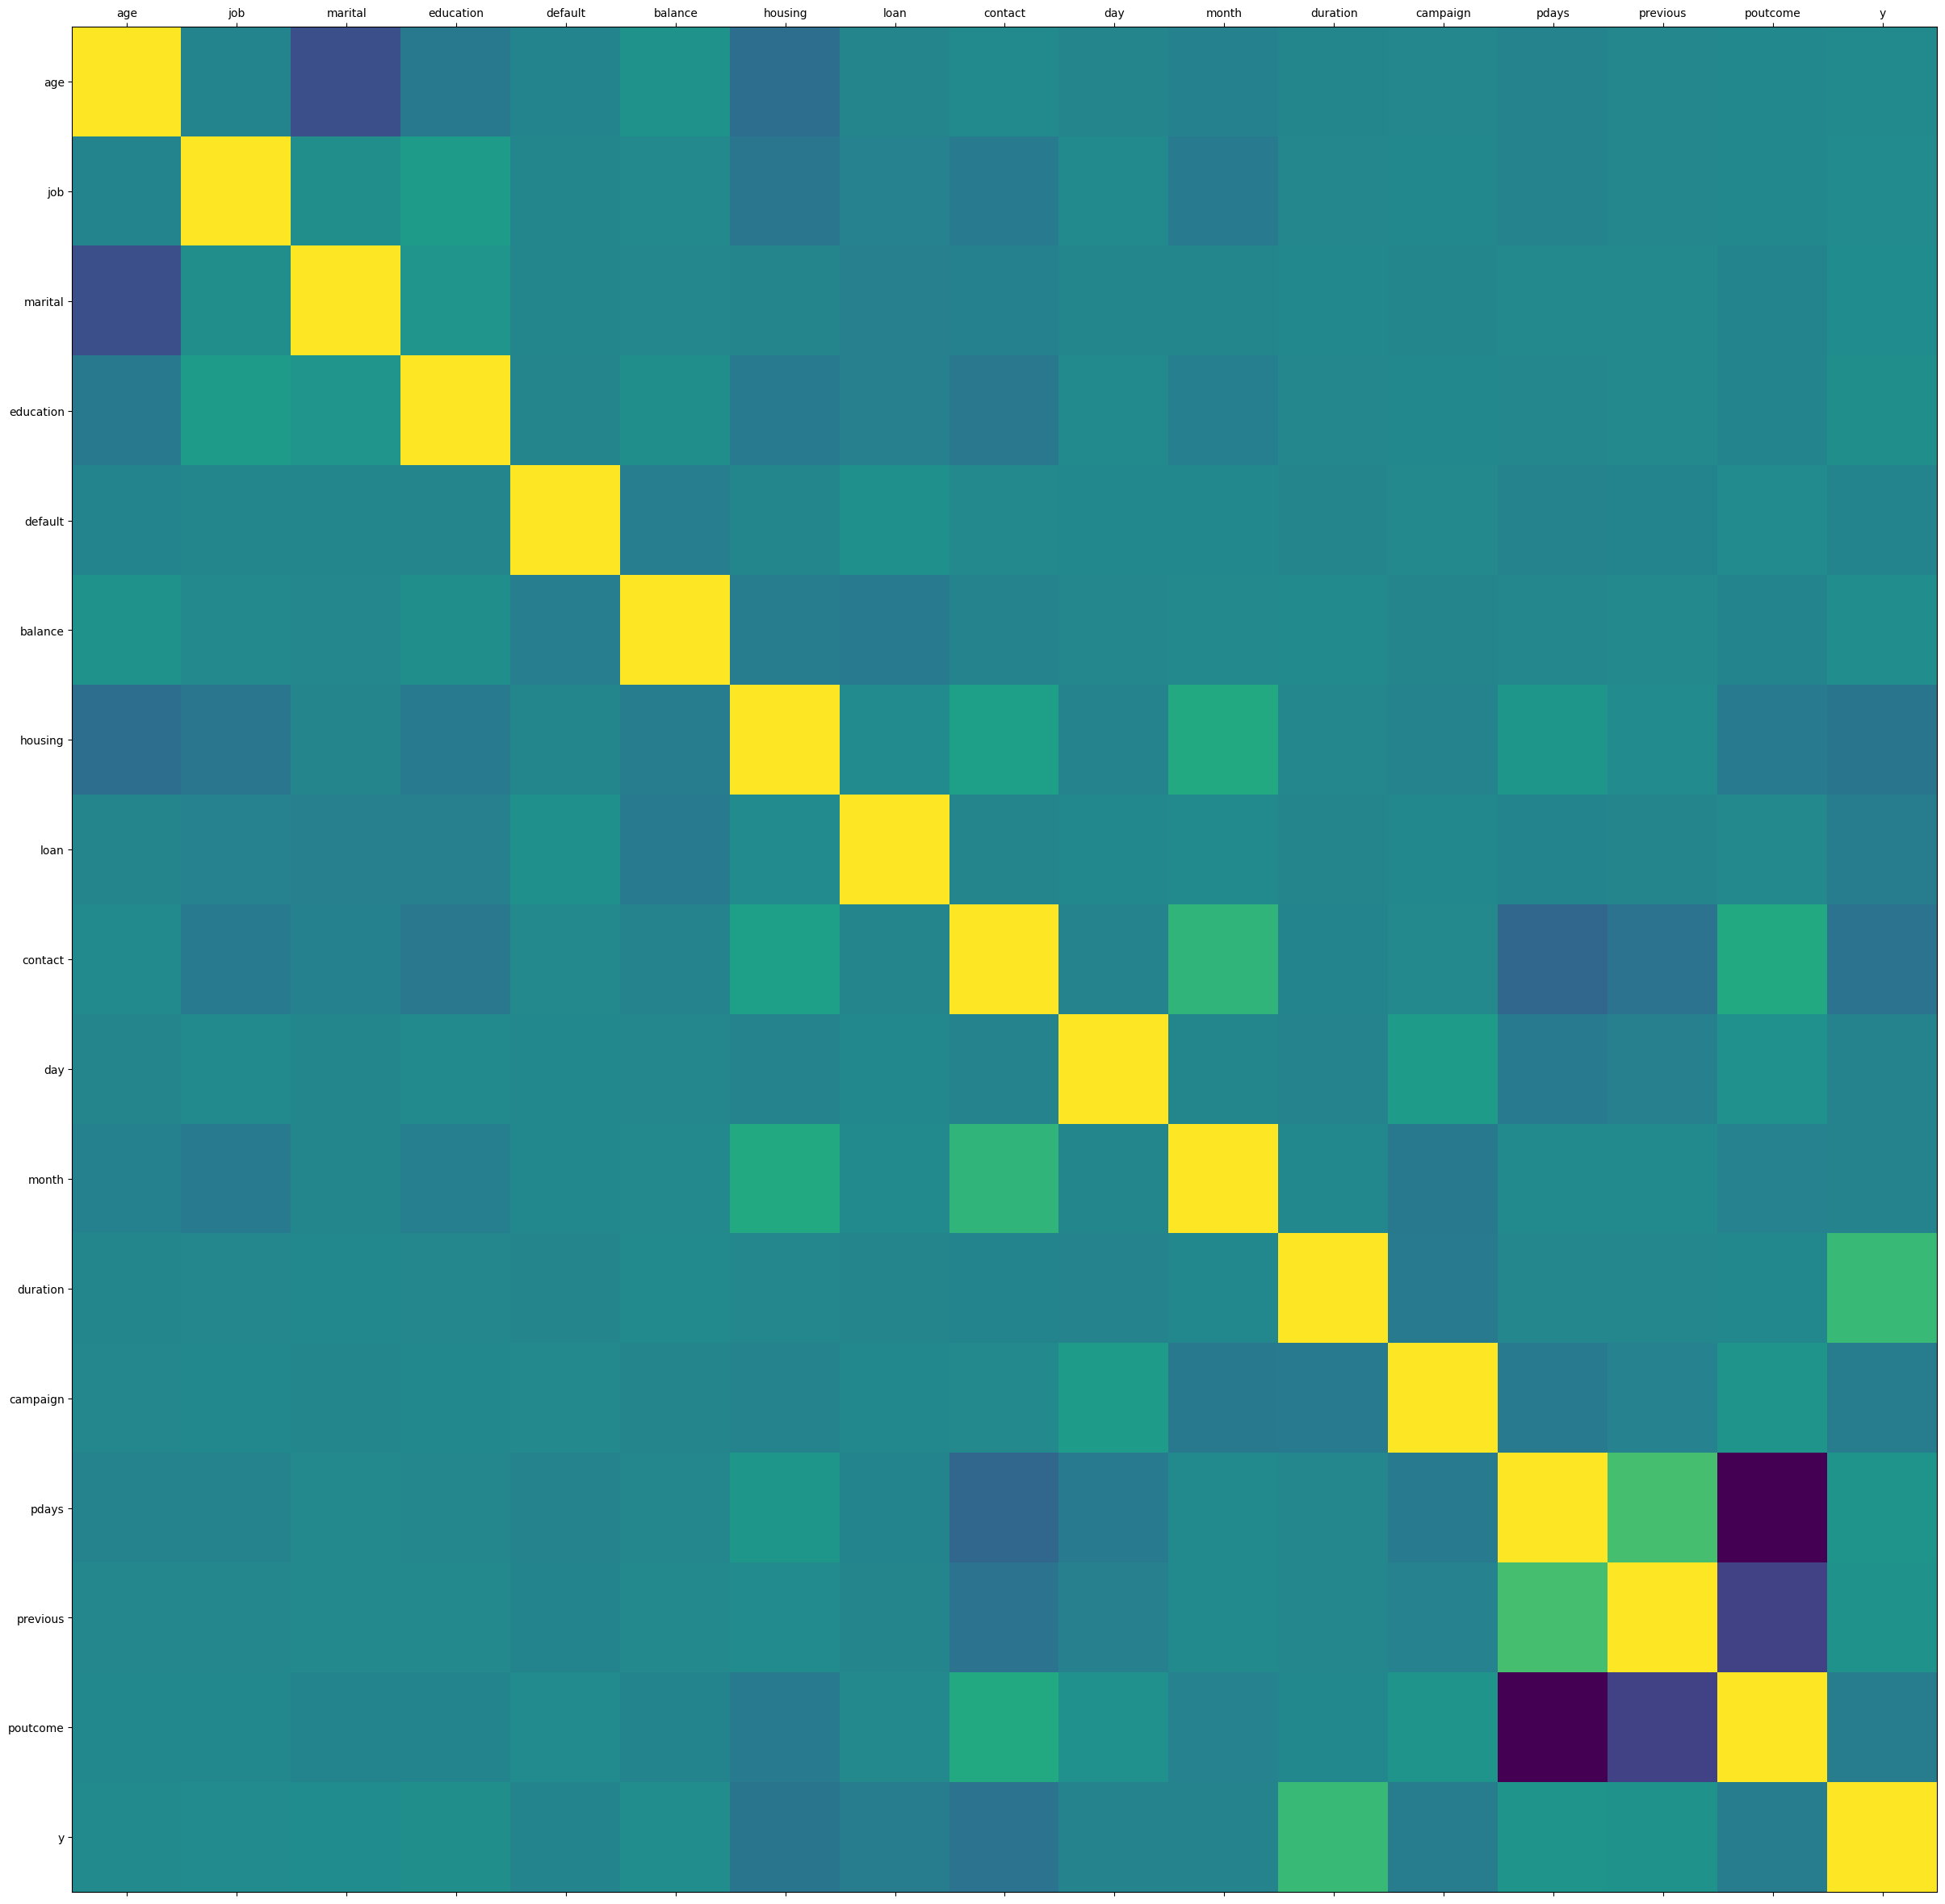

In [16]:
plot_corr(df_copy)

Visualisasi Chart mempresentasikan bahwa kotak kuning yang berada diluar diagonal memiliki arti ada data yang sama

In [17]:
df_copy.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


In [18]:
df_copy.drop(columns=[ 'default', 'loan', 'month', 'campaign'], inplace=True)
df_copy.head()

,age,job,marital,education,balance,housing,contact,day,duration,pdays,previous,poutcome,y
0,58,4,1,2,2143,1,2,5,261,-1,0,3,0
1,44,9,2,1,29,1,2,5,151,-1,0,3,0
2,33,2,1,1,2,1,2,5,76,-1,0,3,0
3,47,1,1,3,1506,1,2,5,92,-1,0,3,0
4,33,11,2,3,1,0,2,5,198,-1,0,3,0


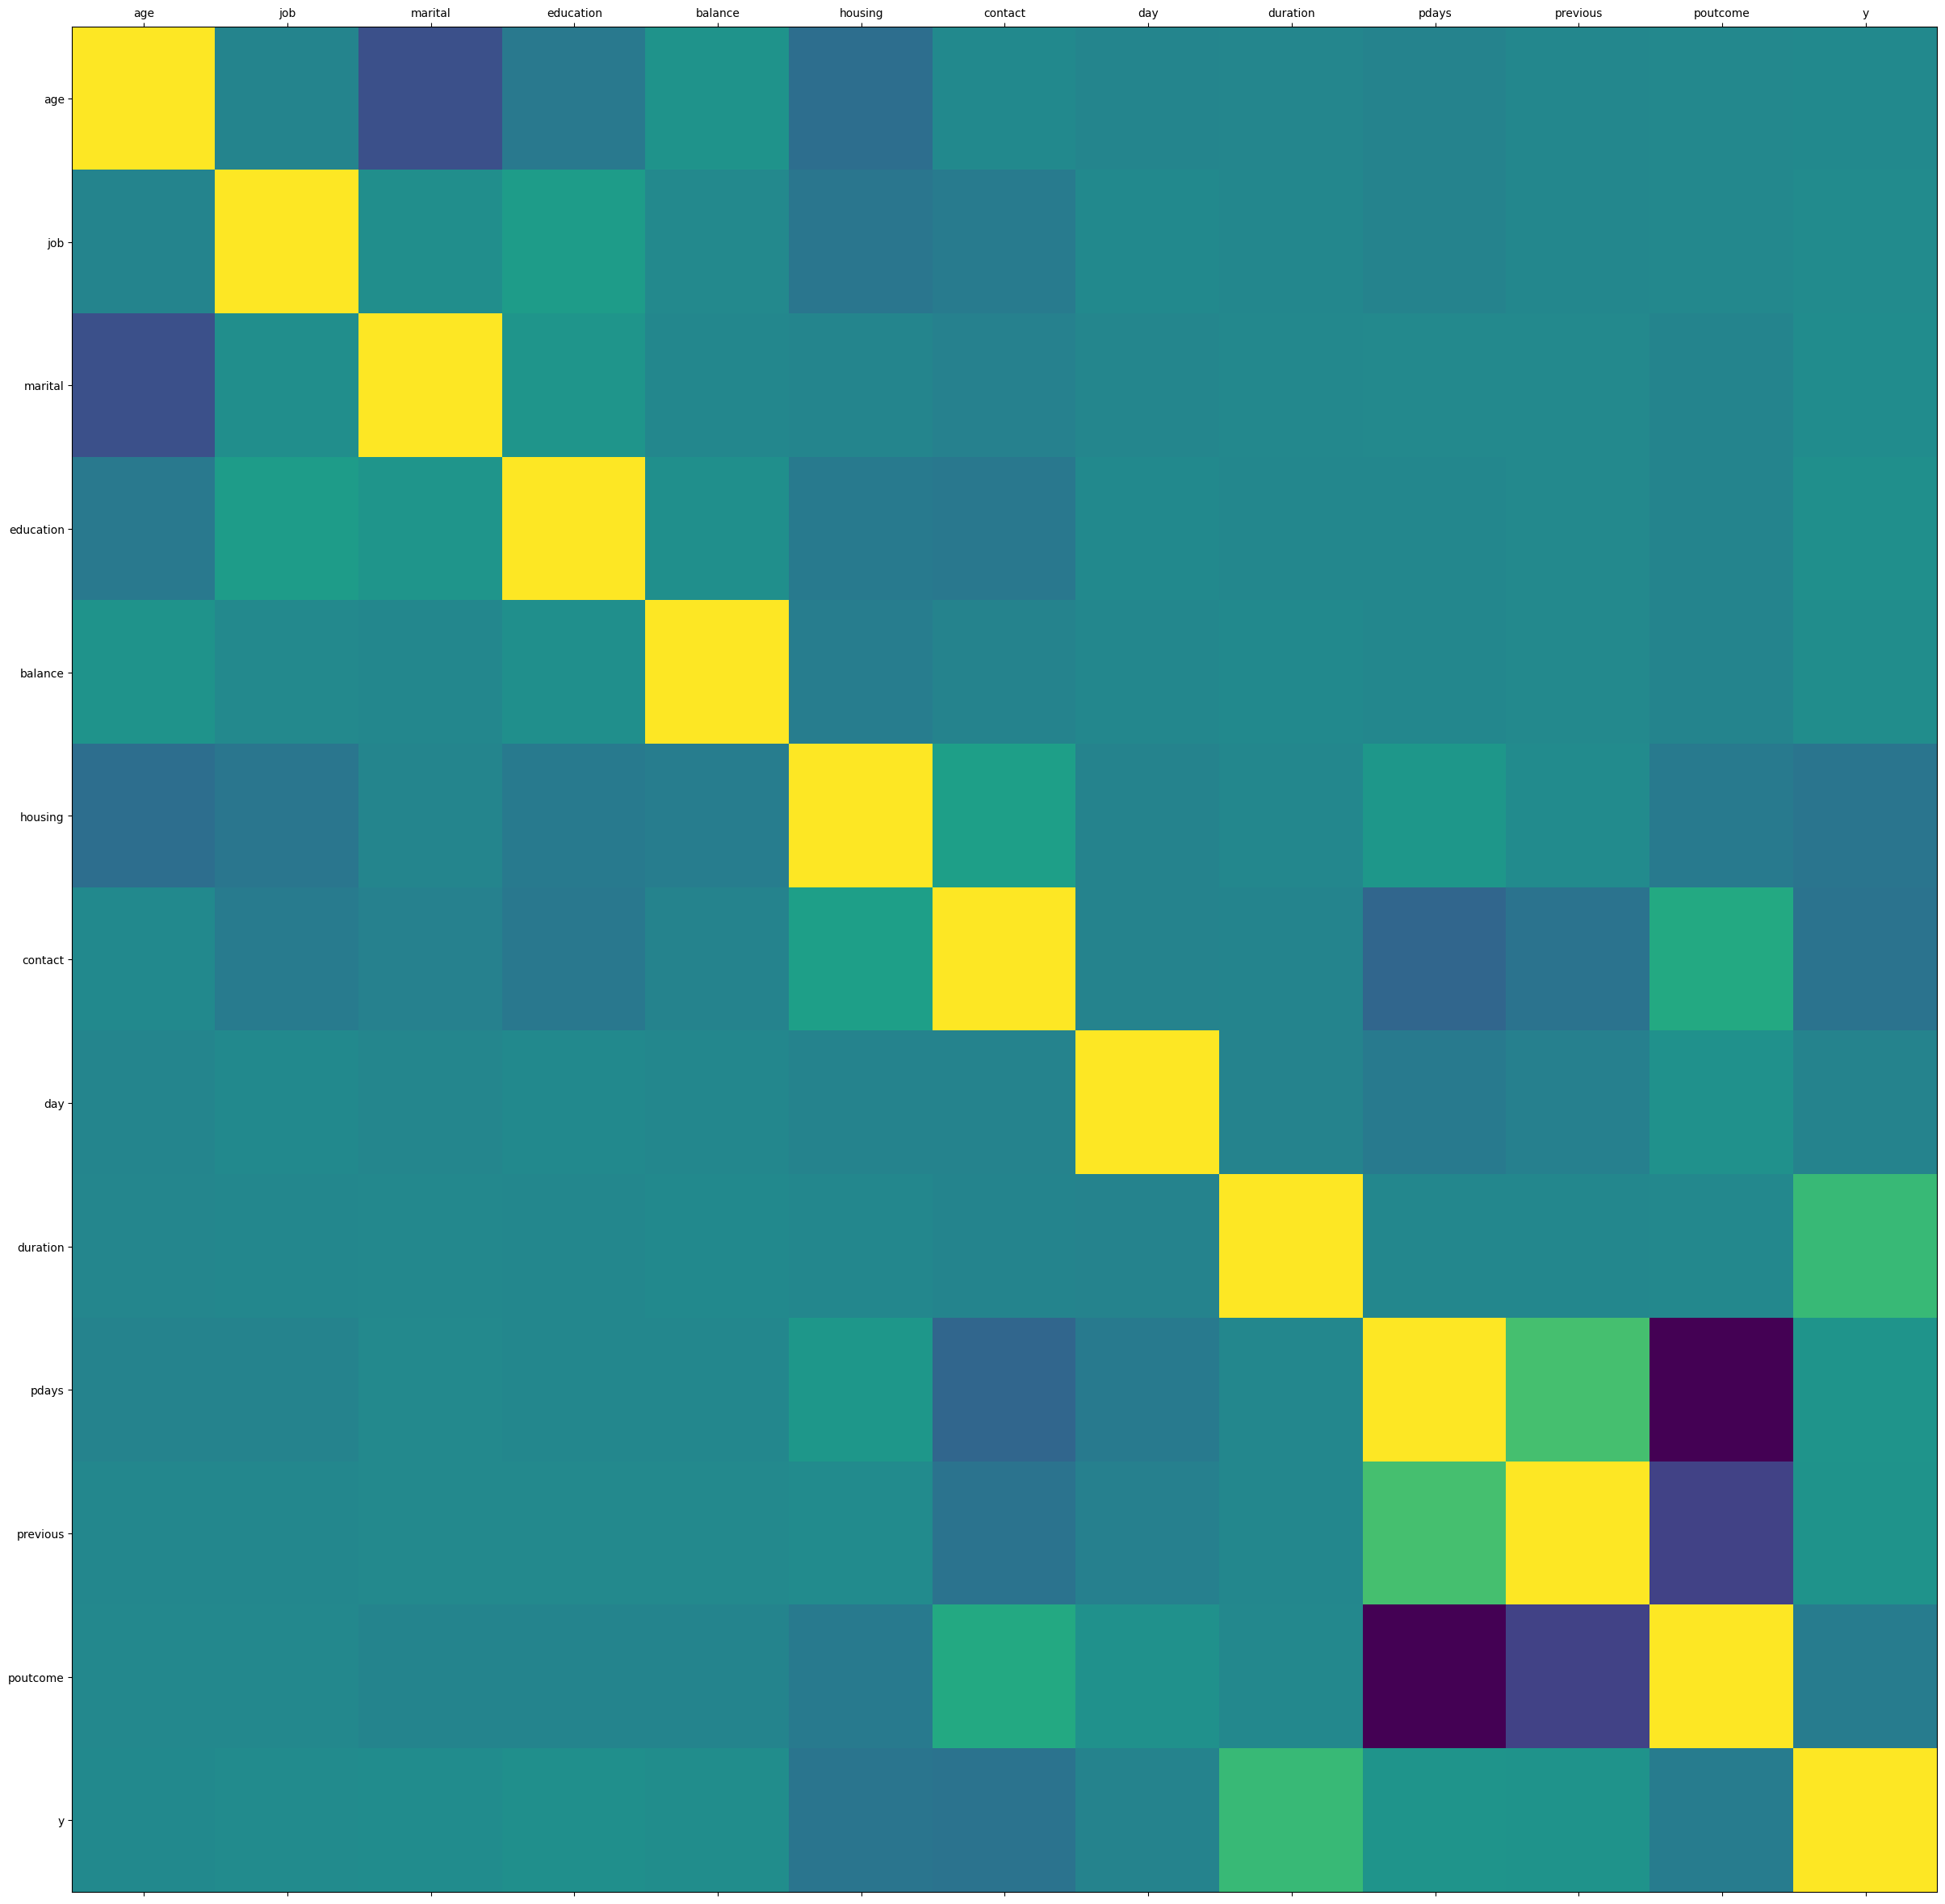

In [19]:
plot_corr(df_copy)

In [20]:
X = df_copy.drop(columns=['y'])
y = df_copy['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## modeling

In [21]:
model_LogisticReg= LogisticRegression(solver='liblinear', random_state=0)
model_LogisticReg.fit(X_train, y_train)
y_predLR = model_LogisticReg.predict(X_test)
print(classification_report(y_test, y_predLR))
print("Accuracy:", metrics.accuracy_score(y_test, y_predLR))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7980
           1       0.57      0.20      0.30      1063

    accuracy                           0.89      9043
   macro avg       0.74      0.59      0.62      9043
weighted avg       0.86      0.89      0.86      9043

Accuracy: 0.8885325666261197


In [22]:
cm_lr=confusion_matrix(y_test,y_predLR)
cm_lr

array([[7819,  161],
       [ 847,  216]], dtype=int64)

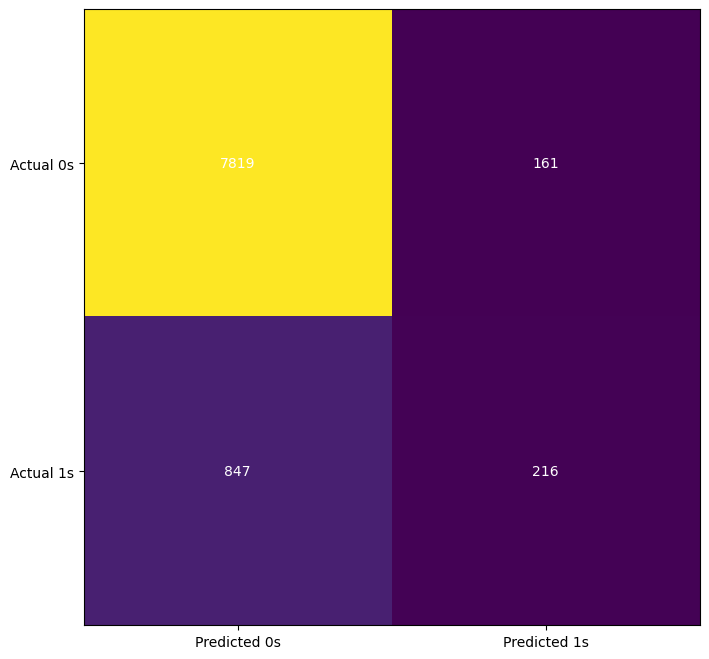

In [23]:
fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm_lr)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_lr[i, j], ha='center', va='center', color='white')
plt.style.use('fivethirtyeight')
plt.show()

In [24]:
model_KNN=KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train, y_train)
y_predKNN = model_KNN.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_predKNN))

Accuracy: 0.8762578790224483


In [25]:
error= []
for i in range(1, 40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i= knn.predict(X_test)
    error.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Error mean')

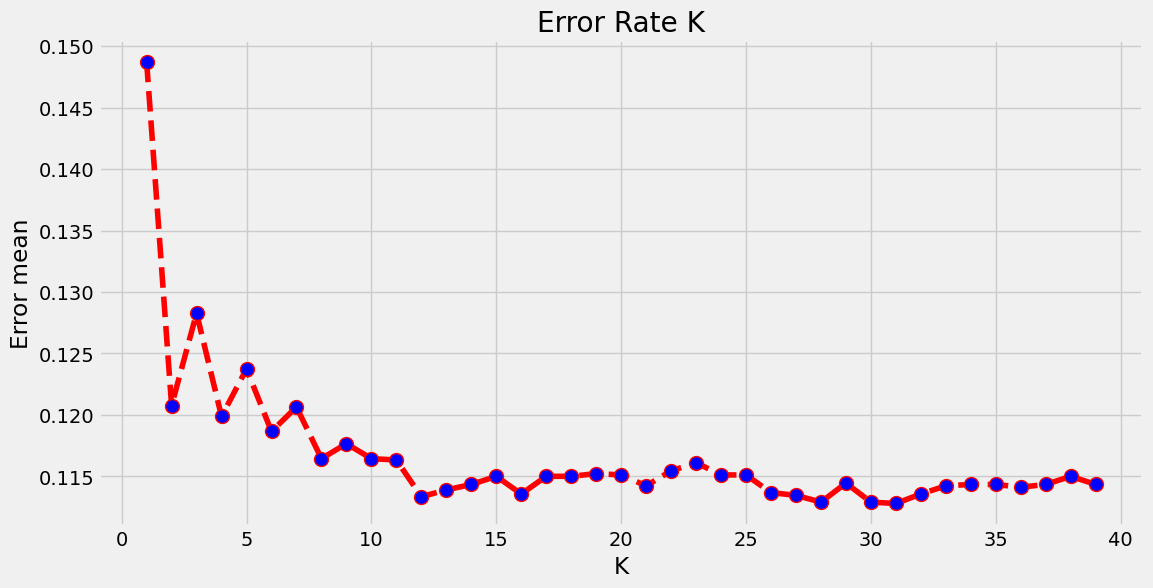

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

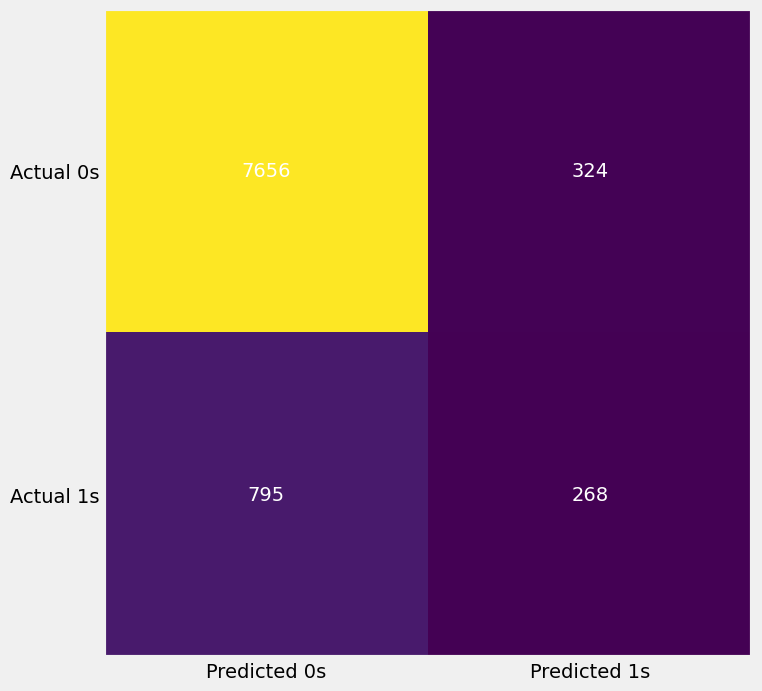

In [27]:
cm_knn=confusion_matrix(y_test,y_predKNN)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm_knn)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_knn[i, j], ha='center', va='center', color='white')
plt.style.use('fivethirtyeight')
plt.show()

In [3]:
!pip install SMV

     ---------------------------------------- 6.1/6.1 MB 2.2 MB/s eta 0:00:00
     -------------------------------------- 149.0/149.0 kB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00
     -------------------------------------- 760.3/760.3 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 896.1/896.1 kB 9.5 MB/s eta 0:00:00
     ------------------------------------- 245.4/245.4 kB 15.7 MB/s eta 0:00:00
     ------------------------------------- 199.1/199.1 kB 11.8 MB/s eta 0:00:00
     ---------------------------------------- 3.2/3.2 MB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB ? eta 0:00:00
     -------------------------------------- 468.5/468.5 kB 9.8 MB/s eta 0:00:00
     -------------------------------------- 150.0/150.0 kB 9.3 MB/s eta 0:00:00
     ------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
spyder 5.2.2 requires ipython<8.0.0,>=7.6.0, but you have ipython 5.10.0 which is incompatible.
spyder-kernels 2.2.1 requires ipykernel>=6.6.1; python_version >= "3", but you have ipykernel 5.5.6 which is incompatible.
spyder-kernels 2.2.1 requires ipython<8,>=7.6.0; python_version >= "3", but you have ipython 5.10.0 which is incompatible.


In [ ]:
cm_svm=confusion_matrix(y_test,y_predSVM)
fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm_svm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_svm[i, j], ha='center', va='center', color='white')
plt.style.use('fivethirtyeight')
plt.show()

In [ ]:
cm_svm=confusion_matrix(y_test,y_predSVM)
fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm_svm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_svm[i, j], ha='center', va='center', color='white')
plt.style.use('fivethirtyeight')
plt.show()

In [ ]:
from six import StringIO 
feature_cols = ['age', 'job', 'marital', 'education', 'housing', 'day_of_week', 'duration', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'y']

dot_data = StringIO()
tree.export_graphviz(model_DT, 
    out_file=dot_data, 
    class_names=['0','1'], # the target names.
    feature_names=feature_cols, # the feature names.
    filled=True, # Whether to fill in the boxes with colours.
    rounded=True, # Whether to round the corners of the boxes.
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [ ]:
cm_dt=confusion_matrix(y_test,y_predDT)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm_dt)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_dt[i, j], ha='center', va='center', color='white')
plt.style.use('fivethirtyeight')
plt.show()

In [ ]:
model_RF = RandomForestClassifier(n_estimators=100)
model_RF.fit(X_train, y_train)
y_predRF = model_RF.predict(X_test)

print(classification_report(y_test, y_predRF))
print("Accuracy:", accuracy_score(y_test, y_predRF))

In [ ]:
cm_rf=confusion_matrix(y_test,y_predRF)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm_rf)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_rf[i, j], ha='center', va='center', color='white')
plt.style.use('fivethirtyeight')
plt.show()

In [ ]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
y_predNB = model_NB.predict(X_test)

print(classification_report(y_test, y_predNB))
print("Accuracy:", accuracy_score(y_test, y_predNB))

In [ ]:
cm_nb=confusion_matrix(y_test,y_predNB)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm_nb)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_nb[i, j], ha='center', va='center', color='white')
plt.style.use('fivethirtyeight')
plt.show()